<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__3)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60-3.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.440246,78.473008,76.115845,0.167990,240.197088,240.061660,0.135428
1,0.0,1.0,24.620617,93.945764,99.451384,0.342967,228.360732,228.305780,0.054952
2,0.0,2.0,56.883735,79.798401,69.577266,0.366902,216.626304,216.227344,0.398959
3,0.0,3.0,70.068502,86.716040,67.282557,0.367204,234.434303,234.015526,0.418778
4,0.0,4.0,48.352372,95.241810,22.208887,-0.026217,175.776852,175.296716,0.480136
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.134239,49.025002,44.291986,0.982128,157.433354,156.587313,0.846041
59996,999.0,56.0,69.701706,25.151042,73.419038,1.771007,180.042793,178.573678,1.469114
59997,999.0,57.0,75.115132,68.949389,59.982256,-0.162749,213.884028,214.128759,-0.244731
59998,999.0,58.0,78.816268,89.396041,79.770527,0.514508,258.497344,258.027384,0.469960


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    75.440246  78.473008  76.115845  ...  240.197088  240.061660  0.135428
      1.0    24.620617  93.945764  99.451384  ...  228.360732  228.305780  0.054952
      2.0    56.883735  79.798401  69.577266  ...  216.626304  216.227344  0.398959
      3.0    70.068502  86.716040  67.282557  ...  234.434303  234.015526  0.418778
      4.0    48.352372  95.241810  22.208887  ...  175.776852  175.296716  0.480136
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   53.134239  49.025002  44.291986  ...  157.433354  156.587313  0.846041
      56.0   69.701706  25.151042  73.419038  ...  180.042793  178.573678  1.469114
      57.0   75.115132  68.949389  59.982256  ...  213.884028  214.128759 -0.244731
      58.0   78.816268  89.396041  79.770527  ...  258.497344  258.027384  0.469960
      59.0   35.536903  80.499894  62.621782  ...  189.709247  188.717272  0.991974

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    75.440246  78.473008  76.115845  ...  240.197088  240.061660  0.135428
      1.0    24.620617  93.945764  99.451384  ...  228.360732  228.305780  0.054952
      2.0    56.883735  79.798401  69.577266  ...  216.626304  216.227344  0.398959
      3.0    70.068502  86.716040  67.282557  ...  234.434303  234.015526  0.418778
      4.0    48.352372  95.241810  22.208887  ...  175.776852  175.296716  0.480136
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   53.134239  49.025002  44.291986  ...  157.433354  156.587313  0.846041
      56.0   69.701706  25.151042  73.419038  ...  180.042793  178.573678  1.469114
      57.0   75.115132  68.949389  59.982256  ...  213.884028  214.128759 -0.244731
      58.0   78.816268  89.396041  79.770527  ...  258.497344  258.027384  0.469960
      59.0   35.536903  80.499894  62.621782  ...  189.709247  188.717272  0.991974

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,75.440246,78.473008,76.115845,0.167990,240.197088,240.061660,0.135428
1,0.0,1.0,24.620617,93.945764,99.451384,0.342967,228.360732,228.305780,0.054952
2,0.0,2.0,56.883735,79.798401,69.577266,0.366902,216.626304,216.227344,0.398959
3,0.0,3.0,70.068502,86.716040,67.282557,0.367204,234.434303,234.015526,0.418778
4,0.0,4.0,48.352372,95.241810,22.208887,-0.026217,175.776852,175.296716,0.480136
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.134239,49.025002,44.291986,0.982128,157.433354,156.587313,0.846041
59996,999.0,56.0,69.701706,25.151042,73.419038,1.771007,180.042793,178.573678,1.469114
59997,999.0,57.0,75.115132,68.949389,59.982256,-0.162749,213.884028,214.128759,-0.244731
59998,999.0,58.0,78.816268,89.396041,79.770527,0.514508,258.497344,258.027384,0.469960


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    75.440246  78.473008  76.115845  ...  240.197088  240.061660  0.135428
      1.0    24.620617  93.945764  99.451384  ...  228.360732  228.305780  0.054952
      2.0    56.883735  79.798401  69.577266  ...  216.626304  216.227344  0.398959
      3.0    70.068502  86.716040  67.282557  ...  234.434303  234.015526  0.418778
      4.0    48.352372  95.241810  22.208887  ...  175.776852  175.296716  0.480136
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   53.134239  49.025002  44.291986  ...  157.433354  156.587313  0.846041
      56.0   69.701706  25.151042  73.419038  ...  180.042793  178.573678  1.469114
      57.0   75.115132  68.949389  59.982256  ...  213.884028  214.128759 -0.244731
      58.0   78.816268  89.396041  79.770527  ...  258.497344  258.027384  0.469960
      59.0   35.536903  80.499894  62.621782  ...  189.709247  188.717272  0.991974

[60000 rows x 7 columns]

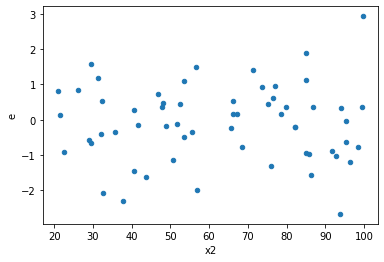

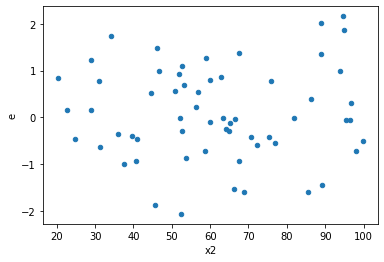

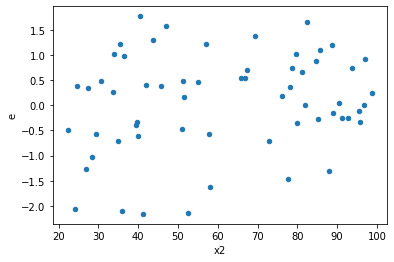

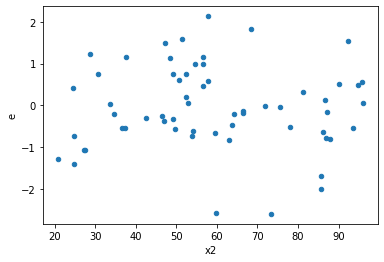

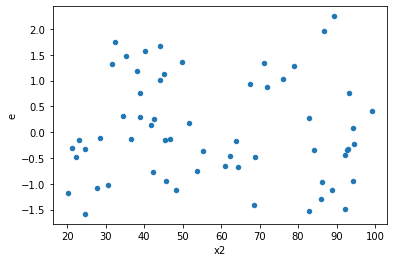

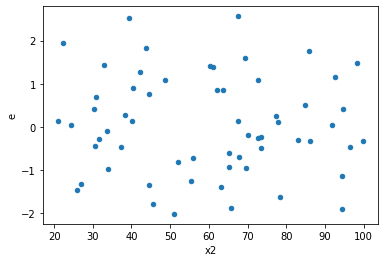

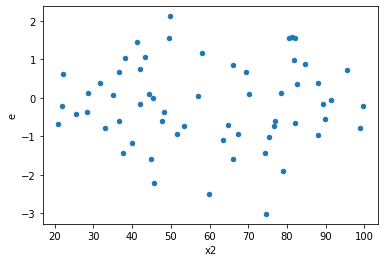

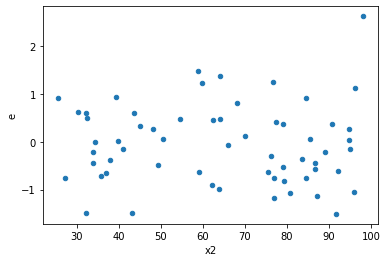

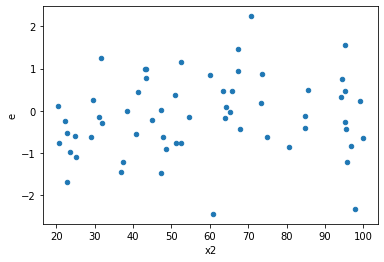

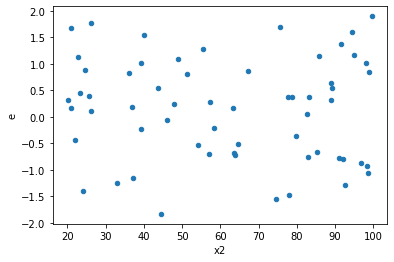

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,28.0,24.201221517997364,29.41733329320713,0.9308162122306679,1.0506190461859688,1.1287072919241465,0.7517285884989606,0.6241357057505197,0.3758642942494803,Reject001=1 : Homoscedasticity
1.0,23.0,31.0,18.47579724471581,27.1612161290506,0.8032955323789482,0.8761682622274387,1.0907172104302372,0.8097088457369526,0.5951455771315237,0.4048544228684763,Reject001=1 : Homoscedasticity
4.0,32.0,22.0,26.006916910519735,23.862322716557,0.8127161534537417,1.0846510325707728,1.334600066654771,0.48509700228659414,0.7574514988567029,0.24254850114329707,Reject001=1 : Homoscedasticity
5.0,22.0,32.0,25.670412431031103,43.26232369186589,1.1668369286832319,1.351947615370809,1.1586431506727108,0.6904313880154027,0.6547843059922986,0.34521569400770136,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,32.05808691662138,28.63405428527833,1.0686028972207127,1.1930855952199304,1.1164910728980615,0.789612491796303,0.6051937541018485,0.3948062458981515,Reject001=1 : Homoscedasticity
7.0,30.0,24.0,13.815241121747796,22.825732378621996,0.4605080373915932,0.9510721824425832,2.0652672813913098,0.07218157807848424,0.9639092109607579,0.03609078903924212,Reject001=1 : Homoscedasticity
8.0,22.0,32.0,8.342137151807671,37.37382715608873,0.37918805235489417,1.1679320986277728,3.080086757413622,0.0037898983083091142,0.9981050508458454,0.0018949491541545571,Reject001=0 : Heteroscedasticity
11.0,20.0,34.0,18.447463110203632,34.989982771209114,0.9223731555101816,1.0291171403296797,1.1157275492915404,0.758064319815388,0.620967840092306,0.379032159907694,Reject001=1 : Homoscedasticity
14.0,30.0,24.0,33.572459646929325,36.24596925703825,1.1190819882309775,1.5102487190432603,1.3495425133511723,0.45517482851422764,0.7724125857428862,0.22758741425711382,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,28.0,24.201221517997364,29.41733329320713,0.9308162122306679,1.0506190461859688,1.1287072919241465,0.7517285884989606,Reject001=1 : Homoscedasticity
1.0,23.0,31.0,18.47579724471581,27.1612161290506,0.8032955323789482,0.8761682622274387,1.0907172104302372,0.8097088457369526,Reject001=1 : Homoscedasticity
2.0,28.0,26.0,36.036003042750416,14.527602733629115,1.2870001086696576,0.5587539512934275,0.43415221764899353,0.03301503280093727,Reject001=1 : Homoscedasticity
3.0,28.0,26.0,33.95957255146421,19.656958134695046,1.2128418768380076,0.7560368513344249,0.6233597847936153,0.223029920606431,Reject001=1 : Homoscedasticity
4.0,32.0,22.0,26.006916910519735,23.862322716557,0.8127161534537417,1.0846510325707728,1.334600066654771,0.48509700228659414,Reject001=1 : Homoscedasticity
5.0,22.0,32.0,25.670412431031103,43.26232369186589,1.1668369286832319,1.351947615370809,1.1586431506727108,0.6904313880154027,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,32.05808691662138,28.63405428527833,1.0686028972207127,1.1930855952199304,1.1164910728980615,0.789612491796303,Reject001=1 : Homoscedasticity
7.0,30.0,24.0,13.815241121747796,22.825732378621996,0.4605080373915932,0.9510721824425832,2.0652672813913098,0.07218157807848424,Reject001=1 : Homoscedasticity
8.0,22.0,32.0,8.342137151807671,37.37382715608873,0.37918805235489417,1.1679320986277728,3.080086757413622,0.0037898983083091142,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64